# Cleaning up the Zillow Inventory & Median Sales Data for Metro US 


## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Data wrangling](#2_Data_wrangling)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
    * [2.2.1 Recap Of Data Science Problem](#2.2.1_Recap_Of_Data_Science_Problem)
    * [2.2.2 Introduction To Notebook](#2.2.2_Introduction_To_Notebook)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Objectives](#2.4_Objectives)
  * [2.5 Load The Ski Resort Data](#2.5_Load_The_Ski_Resort_Data)
  * [2.6 Explore The Data](#2.6_Explore_The_Data)
    * [2.6.1 Find Your Resort Of Interest](#2.6.1_Find_Your_Resort_Of_Interest)
    * [2.6.2 Number Of Missing Values By Column](#2.6.2_Number_Of_Missing_Values_By_Column)
    * [2.6.3 Categorical Features](#2.6.3_Categorical_Features)
      * [2.6.3.1 Unique Resort Names](#2.6.3.1_Unique_Resort_Names)
      * [2.6.3.2 Region And State](#2.6.3.2_Region_And_State)
      * [2.6.3.3 Number of distinct regions and states](#2.6.3.3_Number_of_distinct_regions_and_states)
      * [2.6.3.4 Distribution Of Resorts By Region And State](#2.6.3.4_Distribution_Of_Resorts_By_Region_And_State)
      * [2.6.3.5 Distribution Of Ticket Price By State](#2.6.3.5_Distribution_Of_Ticket_Price_By_State)
        * [2.6.3.5.1 Average weekend and weekday price by state](#2.6.3.5.1_Average_weekend_and_weekday_price_by_state)
        * [2.6.3.5.2 Distribution of weekday and weekend price by state](#2.6.3.5.2_Distribution_of_weekday_and_weekend_price_by_state)
    * [2.6.4 Numeric Features](#2.6.4_Numeric_Features)
      * [2.6.4.1 Numeric data summary](#2.6.4.1_Numeric_data_summary)
      * [2.6.4.2 Distributions Of Feature Values](#2.6.4.2_Distributions_Of_Feature_Values)
        * [2.6.4.2.1 SkiableTerrain_ac](#2.6.4.2.1_SkiableTerrain_ac)
        * [2.6.4.2.2 Snow Making_ac](#2.6.4.2.2_Snow_Making_ac)
        * [2.6.4.2.3 fastEight](#2.6.4.2.3_fastEight)
        * [2.6.4.2.4 fastSixes and Trams](#2.6.4.2.4_fastSixes_and_Trams)
  * [2.7 Derive State-wide Summary Statistics For Our Market Segment](#2.7_Derive_State-wide_Summary_Statistics_For_Our_Market_Segment)
  * [2.8 Drop Rows With No Price Data](#2.8_Drop_Rows_With_No_Price_Data)
  * [2.9 Review distributions](#2.9_Review_distributions)
  * [2.10 Population data](#2.10_Population_data)
  * [2.11 Target Feature](#2.11_Target_Feature)
    * [2.11.1 Number Of Missing Values By Row - Resort](#2.11.1_Number_Of_Missing_Values_By_Row_-_Resort)
  * [2.12 Save data](#2.12_Save_data)
  * [2.13 Summary](#2.13_Summary)

In [205]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
cwd_path = os.getcwd()
data_path = cwd_path[:-9] + '\\data\\raw'
data_file = 'Metro_invt_fs_uc_sfrcondo_raw_week.csv'

file_path = data_path + '\\' + data_file
os.chdir(data_path)
os.listdir()


['Metro_invt_fs_uc_sfrcondo_raw_week.csv',
 'Metro_median_sale_price_uc_SFR_raw_week.csv']

In [43]:
df = pd.read_csv(file_path, parse_dates=True)

df.shape

(97, 169)

In [44]:
df.nunique()

RegionID      97
SizeRank      97
RegionName    97
RegionType     2
StateName     40
              ..
2020-10-31    94
2020-11-07    96
2020-11-14    96
2020-11-21    96
2020-11-28    97
Length: 169, dtype: int64

In [45]:
df.describe()

,RegionID,SizeRank,2017-10-14,2017-10-21,2017-10-28,2017-11-04,2017-11-11,2017-11-18,2017-11-25,2017-12-02,...,2020-09-26,2020-10-03,2020-10-10,2020-10-17,2020-10-24,2020-10-31,2020-11-07,2020-11-14,2020-11-21,2020-11-28
count,97.000000,97.000000,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,...,97.000000,97.000000,97.000000,97.000000,96.000000,95.000000,97.000000,97.000000,97.000000,97.000000
mean,402857.154639,48.731959,2.143268e+04,2.135251e+04,2.108827e+04,2.099835e+04,2.076125e+04,2.052363e+04,1.988434e+04,1.974859e+04,...,15674.164948,15497.484536,15415.721649,15294.793814,15313.854167,15136.578947,14590.474227,14354.020619,14121.309278,13343.608247
std,69695.842610,30.067118,1.345464e+05,1.340407e+05,1.324221e+05,1.318762e+05,1.302056e+05,1.287608e+05,1.249814e+05,1.242324e+05,...,95886.722954,94354.439452,93714.794635,92926.475077,92657.025725,91307.698800,88682.454701,87290.560435,85897.035664,81384.510441
min,102001.000000,0.000000,1.061000e+03,1.053000e+03,1.018000e+03,9.760000e+02,9.870000e+02,9.460000e+02,7.660000e+02,7.500000e+02,...,732.000000,731.000000,729.000000,751.000000,725.000000,712.000000,689.000000,642.000000,635.000000,557.000000
25%,394492.000000,24.000000,2.745000e+03,2.702000e+03,2.682000e+03,2.700000e+03,2.639000e+03,2.611000e+03,2.533000e+03,2.502000e+03,...,1866.000000,1861.000000,1884.000000,1834.000000,1779.000000,1688.000000,1667.000000,1603.000000,1566.000000,1443.000000
50%,394807.000000,48.000000,4.486000e+03,4.506000e+03,4.371000e+03,4.420000e+03,4.334000e+03,4.292000e+03,4.102000e+03,4.107000e+03,...,3223.000000,3235.000000,3191.000000,3200.000000,3146.500000,3055.000000,3002.000000,2958.000000,2876.000000,2704.000000
75%,395025.000000,72.000000,8.610000e+03,8.585000e+03,8.487000e+03,8.449000e+03,8.364000e+03,8.241000e+03,8.112000e+03,7.902000e+03,...,6181.000000,6168.000000,6088.000000,6022.000000,5877.750000,5885.500000,5626.000000,5479.000000,5433.000000,5136.000000
max,753924.000000,159.000000,1.329553e+06,1.324548e+06,1.308531e+06,1.303129e+06,1.286621e+06,1.272333e+06,1.234947e+06,1.227505e+06,...,946262.000000,931097.000000,924736.000000,916975.000000,909612.000000,891672.000000,874996.000000,861239.000000,847452.000000,802818.000000


In [46]:
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2017-10-14,2017-10-21,2017-10-28,2017-11-04,2017-11-11,...,2020-09-26,2020-10-03,2020-10-10,2020-10-17,2020-10-24,2020-10-31,2020-11-07,2020-11-14,2020-11-21,2020-11-28
0,102001,0,United States,Country,NaN,1329553.0,1324548.0,1308531.0,1303129.0,1286621.0,...,946262.0,931097.0,924736.0,916975.0,909612.0,891672.0,874996.0,861239.0,847452.0,802818.0
1,394913,1,"New York, NY",Msa,NY,67462.0,67333.0,66334.0,65836.0,64317.0,...,65793.0,65908.0,66114.0,65429.0,65258.0,64337.0,63000.0,62334.0,61324.0,58814.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,18029.0,17845.0,17296.0,17018.0,16648.0,...,17673.0,17070.0,17188.0,17489.0,17623.0,17579.0,16702.0,16422.0,15988.0,14896.0
3,394463,3,"Chicago, IL",Msa,IL,38109.0,37722.0,37182.0,36553.0,35480.0,...,31633.0,31539.0,31627.0,31178.0,30902.0,30124.0,29637.0,28873.0,28088.0,26337.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,22104.0,21804.0,21751.0,21687.0,20961.0,...,20336.0,20075.0,19727.0,19260.0,18908.0,18350.0,18044.0,17553.0,17250.0,16133.0


In [47]:
df.drop(columns=['RegionType', 'RegionID'], axis=1, inplace=True)

In [48]:
df.head(20)

,SizeRank,RegionName,StateName,2017-10-14,2017-10-21,2017-10-28,2017-11-04,2017-11-11,2017-11-18,2017-11-25,...,2020-09-26,2020-10-03,2020-10-10,2020-10-17,2020-10-24,2020-10-31,2020-11-07,2020-11-14,2020-11-21,2020-11-28
0,0,United States,NaN,1329553.0,1324548.0,1308531.0,1303129.0,1286621.0,1272333.0,1234947.0,...,946262.0,931097.0,924736.0,916975.0,909612.0,891672.0,874996.0,861239.0,847452.0,802818.0
1,1,"New York, NY",NY,67462.0,67333.0,66334.0,65836.0,64317.0,63556.0,61355.0,...,65793.0,65908.0,66114.0,65429.0,65258.0,64337.0,63000.0,62334.0,61324.0,58814.0
2,2,"Los Angeles-Long Beach-Anaheim, CA",CA,18029.0,17845.0,17296.0,17018.0,16648.0,16415.0,15440.0,...,17673.0,17070.0,17188.0,17489.0,17623.0,17579.0,16702.0,16422.0,15988.0,14896.0
3,3,"Chicago, IL",IL,38109.0,37722.0,37182.0,36553.0,35480.0,34548.0,32984.0,...,31633.0,31539.0,31627.0,31178.0,30902.0,30124.0,29637.0,28873.0,28088.0,26337.0
4,4,"Dallas-Fort Worth, TX",TX,22104.0,21804.0,21751.0,21687.0,20961.0,20834.0,20066.0,...,20336.0,20075.0,19727.0,19260.0,18908.0,18350.0,18044.0,17553.0,17250.0,16133.0
5,5,"Philadelphia, PA",PA,24244.0,24070.0,24483.0,24675.0,25525.0,24113.0,23677.0,...,13830.0,13733.0,13393.0,13337.0,13359.0,13091.0,12778.0,12717.0,12621.0,11897.0
6,6,"Houston, TX",TX,27046.0,26909.0,26654.0,26531.0,26269.0,25849.0,25313.0,...,23124.0,23410.0,23039.0,22989.0,22781.0,22154.0,21919.0,21615.0,21576.0,20577.0
7,7,"Washington, DC",DC,18508.0,18231.0,17799.0,17562.0,20339.0,20289.0,20327.0,...,11625.0,11788.0,11775.0,11899.0,11892.0,11682.0,11452.0,11335.0,11117.0,10211.0
8,8,"Miami-Fort Lauderdale, FL",FL,43212.0,43631.0,43564.0,44136.0,44482.0,44864.0,44152.0,...,41897.0,41576.0,42059.0,41677.0,41303.0,41134.0,41187.0,40727.0,41008.0,39966.0
9,9,"Atlanta, GA",GA,27153.0,26906.0,26699.0,26551.0,25697.0,25188.0,24338.0,...,22229.0,22261.0,22048.0,21793.0,21731.0,21299.0,20957.0,20382.0,19982.0,18740.0


In [ ]:
city_acronyms = {'NYC':'New York', 'SATX':'San Antonio', 'DFW':'Dallas-Fort Worth', 'ATX':'Austin'}

In [127]:
#Separate the city / state names into a separate dictionary that can be used later. 

regions = df.RegionName.tolist()
region_state= {}

for city in regions:
    try:
        region_state[city.split(',', 1)[0]] = city.split(',', 1)[1].strip()
    except:
        pass
region_state

def strip_state(name):
    return name.split(',', 1)[0]

In [178]:
#ny= df[df['RegionName']=='New York, NY']
#nymelt = pd.melt(ny, id_vars = ['RegionName', 'SizeRank', 'StateName'])
#nymelt['date'] = pd.to_datetime(nymelt['variable'])
drop_columns = ['RegionName', 'SizeRank', 'StateName']
def extract_region(regionname, df, drop_col):
    #Extracts the specified region from the zillow data
    # Melts dataframe
    # sets index to data timestamp 
    # Returns a dataframe
    
    
    filterdf = df[df['RegionName']==regionname]
    
    tempmelt = pd.melt(filterdf, id_vars = ['RegionName', 'SizeRank', 'StateName'])
    tempmelt['date'] = pd.to_datetime(tempmelt['variable'])
    tempmelt.set_index('date', inplace=True)
    tempmelt.head()
    tempmelt.drop(columns=drop_col, inplace=True)
    tempmelt.drop(columns=['variable'], inplace=True)
    tempregion = strip_state(regionname)
    newname = tempregion + '_Inv'
    tempmelt.rename(columns={'value':newname}, inplace=True)
    
    return tempmelt

In [179]:
df.head(10)

,SizeRank,RegionName,StateName,2017-10-14,2017-10-21,2017-10-28,2017-11-04,2017-11-11,2017-11-18,2017-11-25,...,2020-09-26,2020-10-03,2020-10-10,2020-10-17,2020-10-24,2020-10-31,2020-11-07,2020-11-14,2020-11-21,2020-11-28
0,0,United States,NaN,1329553.0,1324548.0,1308531.0,1303129.0,1286621.0,1272333.0,1234947.0,...,946262.0,931097.0,924736.0,916975.0,909612.0,891672.0,874996.0,861239.0,847452.0,802818.0
1,1,"New York, NY",NY,67462.0,67333.0,66334.0,65836.0,64317.0,63556.0,61355.0,...,65793.0,65908.0,66114.0,65429.0,65258.0,64337.0,63000.0,62334.0,61324.0,58814.0
2,2,"Los Angeles-Long Beach-Anaheim, CA",CA,18029.0,17845.0,17296.0,17018.0,16648.0,16415.0,15440.0,...,17673.0,17070.0,17188.0,17489.0,17623.0,17579.0,16702.0,16422.0,15988.0,14896.0
3,3,"Chicago, IL",IL,38109.0,37722.0,37182.0,36553.0,35480.0,34548.0,32984.0,...,31633.0,31539.0,31627.0,31178.0,30902.0,30124.0,29637.0,28873.0,28088.0,26337.0
4,4,"Dallas-Fort Worth, TX",TX,22104.0,21804.0,21751.0,21687.0,20961.0,20834.0,20066.0,...,20336.0,20075.0,19727.0,19260.0,18908.0,18350.0,18044.0,17553.0,17250.0,16133.0
5,5,"Philadelphia, PA",PA,24244.0,24070.0,24483.0,24675.0,25525.0,24113.0,23677.0,...,13830.0,13733.0,13393.0,13337.0,13359.0,13091.0,12778.0,12717.0,12621.0,11897.0
6,6,"Houston, TX",TX,27046.0,26909.0,26654.0,26531.0,26269.0,25849.0,25313.0,...,23124.0,23410.0,23039.0,22989.0,22781.0,22154.0,21919.0,21615.0,21576.0,20577.0
7,7,"Washington, DC",DC,18508.0,18231.0,17799.0,17562.0,20339.0,20289.0,20327.0,...,11625.0,11788.0,11775.0,11899.0,11892.0,11682.0,11452.0,11335.0,11117.0,10211.0
8,8,"Miami-Fort Lauderdale, FL",FL,43212.0,43631.0,43564.0,44136.0,44482.0,44864.0,44152.0,...,41897.0,41576.0,42059.0,41677.0,41303.0,41134.0,41187.0,40727.0,41008.0,39966.0
9,9,"Atlanta, GA",GA,27153.0,26906.0,26699.0,26551.0,25697.0,25188.0,24338.0,...,22229.0,22261.0,22048.0,21793.0,21731.0,21299.0,20957.0,20382.0,19982.0,18740.0


In [184]:
#This will find the regions for the specified state and return a list of regions

def find_roi(state):
    roi = [r for r in regions if state in r]
    return roi


In [186]:
tx_regions = find_roi('TX')
tx_regions


['Dallas-Fort Worth, TX',
 'Houston, TX',
 'San Antonio, TX',
 'Austin, TX',
 'El Paso, TX',
 'McAllen, TX']

In [189]:
ca_regions = find_roi('CA')
ca_regions

['Los Angeles-Long Beach-Anaheim, CA',
 'San Francisco, CA',
 'Riverside, CA',
 'San Diego, CA',
 'Sacramento, CA',
 'San Jose, CA',
 'Fresno, CA',
 'Bakersfield, CA',
 'Ventura, CA',
 'Stockton, CA']

In [188]:
wi_regions = find_roi('WI')
wi_regions

['Milwaukee, WI', 'Madison, WI']

In [187]:
ny_regions = find_roi('NY')
ny_regions

['New York, NY', 'Buffalo, NY', 'Rochester, NY', 'Albany, NY', 'Syracuse, NY']

In [180]:
dfw = extract_region('Dallas-Fort Worth, TX', df, drop_columns)

In [200]:
tx_df_list = list()
for i in tx_regions:
    tx_df_list.append(extract_region(i, df, drop_columns))
    
tx = pd.concat(tx_df_list, axis=1)


In [202]:
tx.head(10)

,Dallas-Fort Worth_Inv,Houston_Inv,San Antonio_Inv,Austin_Inv,El Paso_Inv,McAllen_Inv
date,,,,,,
2017-10-14,22104.0,27046.0,8610.0,6827.0,3894.0,1856.0
2017-10-21,21804.0,26909.0,8624.0,6859.0,3958.0,1885.0
2017-10-28,21751.0,26654.0,8487.0,6713.0,3951.0,1908.0
2017-11-04,21687.0,26531.0,8491.0,6622.0,3935.0,1910.0
2017-11-11,20961.0,26269.0,8367.0,6377.0,3951.0,1866.0
2017-11-18,20834.0,25849.0,8375.0,6343.0,3979.0,1896.0
2017-11-25,20066.0,25313.0,8112.0,5949.0,3919.0,1863.0
2017-12-02,19754.0,25334.0,7902.0,5845.0,3904.0,1896.0
2017-12-09,18977.0,24898.0,7761.0,5596.0,3803.0,1876.0


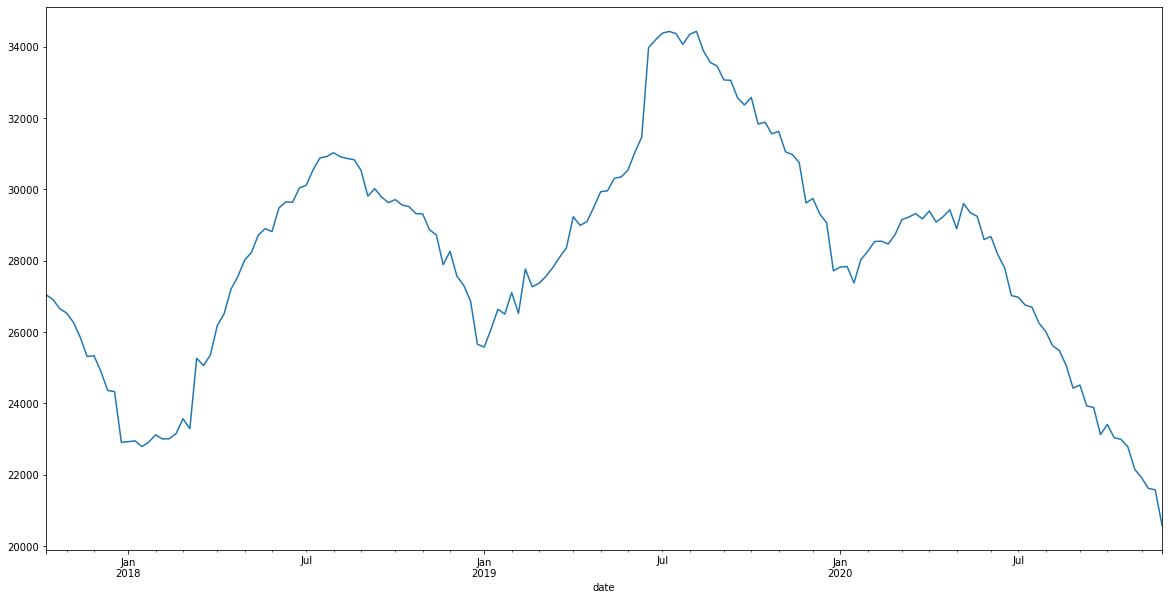

In [247]:
#ax1, ax2 = plt.subplots(2, 1)
plt.figure(figsize=(20,10))
tx['Houston_Inv'].plot()
plt.show()
#plt.legend(bbox_to_anchor=(1.1, 1.05))


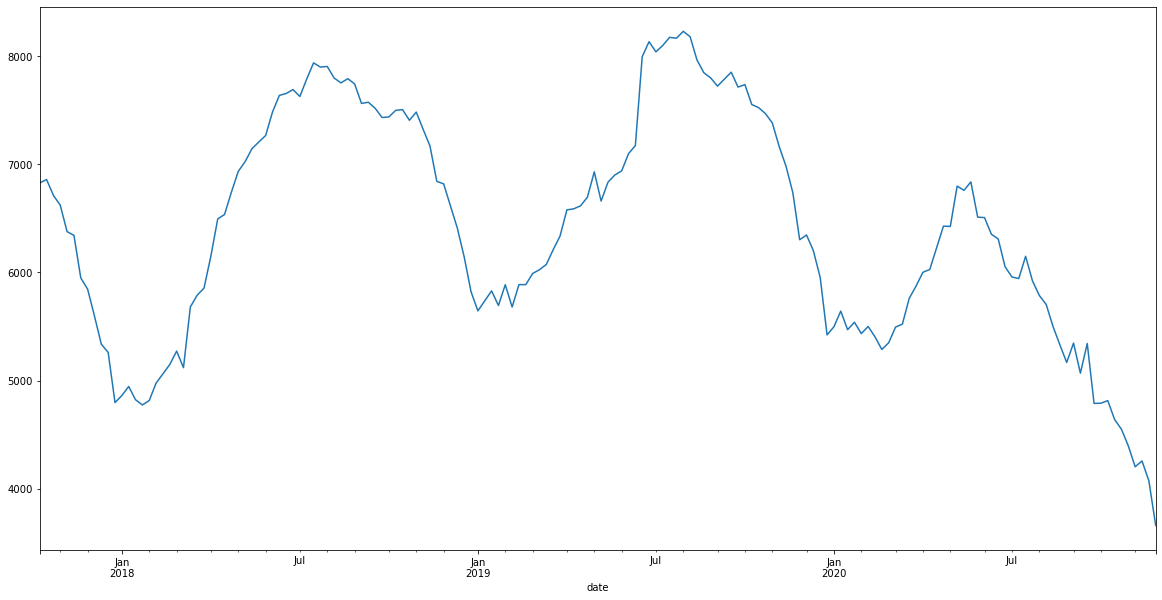

In [248]:
plt.figure(figsize=(20,10))
tx['Austin_Inv'].plot()
plt.show()

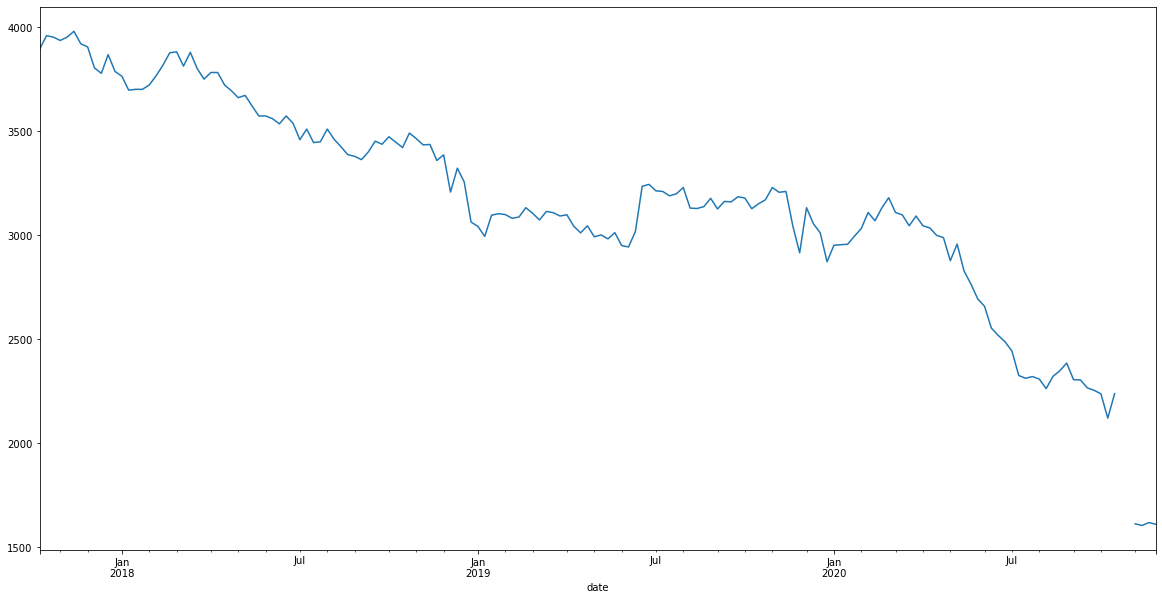

In [249]:
plt.figure(figsize=(20,10))
tx['El Paso_Inv'].plot()
plt.show()

In [252]:
tx['El Paso_Inv'].isna().sum()

2

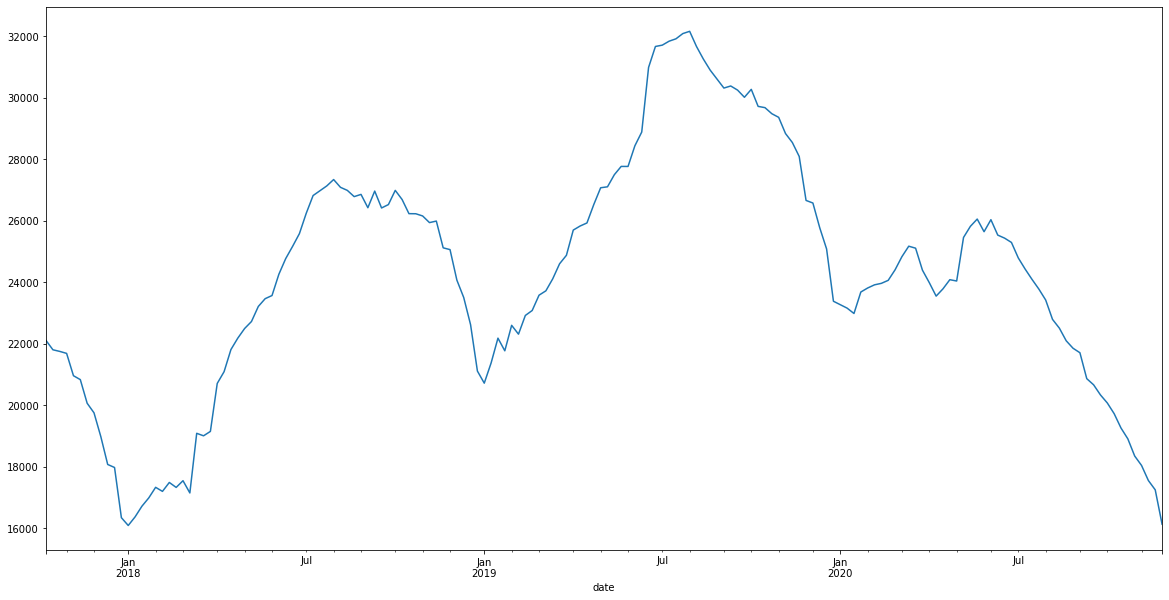

In [250]:
plt.figure(figsize=(20,10))
tx['Dallas-Fort Worth_Inv'].plot()
plt.show()

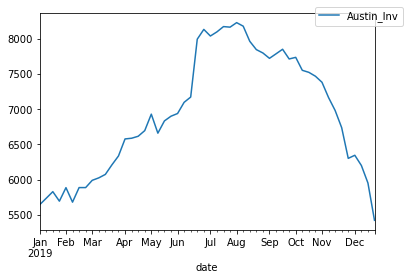

In [213]:
fig = plt.figure()

#tx['2019']['Houston_Inv'].plot(subplots=True)
#tx['2019']['San Antonio_Inv'].plot(subplots=True)
#tx['2019']['Dallas-Fort Worth_Inv'].plot(subplots=True)
tx['2019']['Austin_Inv'].plot(subplots=True)

plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [199]:
htx = extract_region('Houston, TX',df, drop_columns)
htx.isna().sum()


Houston_Inv    0
dtype: int64

In [171]:
nymelt.set_index('date')
nymelt['NYC_Median_Value'] = nymelt['value']

In [14]:
#df.drop(columns=['StateName'], axis=1, inplace=True)

In [62]:
nymelt


,RegionName,SizeRank,StateName,variable,value,date,NY_Median_Value,NYC_Median_Value
0,"New York, NY",1,NY,2017-10-14,67462.0,2017-10-14,67462.0,67462.0
1,"New York, NY",1,NY,2017-10-21,67333.0,2017-10-21,67333.0,67333.0
2,"New York, NY",1,NY,2017-10-28,66334.0,2017-10-28,66334.0,66334.0
3,"New York, NY",1,NY,2017-11-04,65836.0,2017-11-04,65836.0,65836.0
4,"New York, NY",1,NY,2017-11-11,64317.0,2017-11-11,64317.0,64317.0
...,...,...,...,...,...,...,...,...
159,"New York, NY",1,NY,2020-10-31,64337.0,2020-10-31,64337.0,64337.0
160,"New York, NY",1,NY,2020-11-07,63000.0,2020-11-07,63000.0,63000.0
161,"New York, NY",1,NY,2020-11-14,62334.0,2020-11-14,62334.0,62334.0
162,"New York, NY",1,NY,2020-11-21,61324.0,2020-11-21,61324.0,61324.0


In [15]:
df.head()

,SizeRank,RegionName,StateName,2017-10-14,2017-10-21,2017-10-28,2017-11-04,2017-11-11,2017-11-18,2017-11-25,...,2020-09-26,2020-10-03,2020-10-10,2020-10-17,2020-10-24,2020-10-31,2020-11-07,2020-11-14,2020-11-21,2020-11-28
0,0,United States,NaN,1329553.0,1324548.0,1308531.0,1303129.0,1286621.0,1272333.0,1234947.0,...,946262.0,931097.0,924736.0,916975.0,909612.0,891672.0,874996.0,861239.0,847452.0,802818.0
1,1,"New York, NY",NY,67462.0,67333.0,66334.0,65836.0,64317.0,63556.0,61355.0,...,65793.0,65908.0,66114.0,65429.0,65258.0,64337.0,63000.0,62334.0,61324.0,58814.0
2,2,"Los Angeles-Long Beach-Anaheim, CA",CA,18029.0,17845.0,17296.0,17018.0,16648.0,16415.0,15440.0,...,17673.0,17070.0,17188.0,17489.0,17623.0,17579.0,16702.0,16422.0,15988.0,14896.0
3,3,"Chicago, IL",IL,38109.0,37722.0,37182.0,36553.0,35480.0,34548.0,32984.0,...,31633.0,31539.0,31627.0,31178.0,30902.0,30124.0,29637.0,28873.0,28088.0,26337.0
4,4,"Dallas-Fort Worth, TX",TX,22104.0,21804.0,21751.0,21687.0,20961.0,20834.0,20066.0,...,20336.0,20075.0,19727.0,19260.0,18908.0,18350.0,18044.0,17553.0,17250.0,16133.0


In [16]:
mdf = pd.melt(df, id_vars = ['RegionName', 'SizeRank', 'StateName'])
mdf[mdf['RegionName'] == 'Chicago, IL']

,RegionName,SizeRank,StateName,variable,value
3,"Chicago, IL",3,IL,2017-10-14,38109.0
100,"Chicago, IL",3,IL,2017-10-21,37722.0
197,"Chicago, IL",3,IL,2017-10-28,37182.0
294,"Chicago, IL",3,IL,2017-11-04,36553.0
391,"Chicago, IL",3,IL,2017-11-11,35480.0
...,...,...,...,...,...
15426,"Chicago, IL",3,IL,2020-10-31,30124.0
15523,"Chicago, IL",3,IL,2020-11-07,29637.0
15620,"Chicago, IL",3,IL,2020-11-14,28873.0
15717,"Chicago, IL",3,IL,2020-11-21,28088.0


In [17]:
transpose = pd.DataFrame(data=df)

In [18]:
transpose = transpose.T


In [19]:
transpose.columns = transpose.iloc[1]

In [20]:
transpose.head()

RegionName,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL","Atlanta, GA",...,"Madison, WI","Lakeland, FL","Ogden, UT","Daytona Beach, FL","Des Moines, IA","Jackson, MS","Augusta, GA","Harrisburg, PA","Provo, UT","Fort Collins, CO"
SizeRank,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,94,96,100,159
RegionName,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL","Atlanta, GA",...,"Madison, WI","Lakeland, FL","Ogden, UT","Daytona Beach, FL","Des Moines, IA","Jackson, MS","Augusta, GA","Harrisburg, PA","Provo, UT","Fort Collins, CO"
StateName,NaN,NY,CA,IL,TX,PA,TX,DC,FL,GA,...,WI,FL,UT,FL,IA,MS,GA,PA,UT,CO
2017-10-14,1.32955e+06,67462,18029,38109,22104,24244,27046,18508,43212,27153,...,2577,2742,1401,4359,3441,2204,3065,2275,1250,1751
2017-10-21,1.32455e+06,67333,17845,37722,21804,24070,26909,18231,43631,26906,...,2585,2671,1361,4401,3439,2232,3101,2257,1237,1724


In [21]:
mdf['week'] = pd.to_datetime(mdf['variable'])
mdf.drop(columns='variable', axis=1, inplace=True)

In [22]:
mdf.rename(columns={'value':'inventory'}, inplace=True)

In [23]:
sat_inventory = mdf[mdf['RegionName'] == 'San Antonio, TX']
sat_inventory

,RegionName,SizeRank,StateName,inventory,week
26,"San Antonio, TX",26,TX,8610.0,2017-10-14
123,"San Antonio, TX",26,TX,8624.0,2017-10-21
220,"San Antonio, TX",26,TX,8487.0,2017-10-28
317,"San Antonio, TX",26,TX,8491.0,2017-11-04
414,"San Antonio, TX",26,TX,8367.0,2017-11-11
...,...,...,...,...,...
15449,"San Antonio, TX",26,TX,7773.0,2020-10-31
15546,"San Antonio, TX",26,TX,7727.0,2020-11-07
15643,"San Antonio, TX",26,TX,7661.0,2020-11-14
15740,"San Antonio, TX",26,TX,7609.0,2020-11-21


In [24]:
import matplotlib as plt
import seaborn as sns

<AxesSubplot:xlabel='week'>

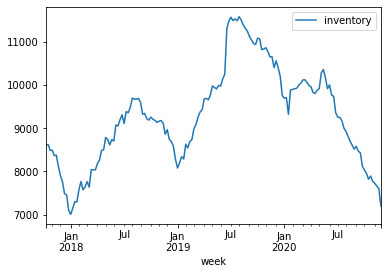

In [25]:
sat_inventory.plot(kind='line', x='week', y='inventory')

In [26]:
atx_inventory = mdf[mdf['RegionName'] == 'Austin, TX']

<AxesSubplot:xlabel='week'>

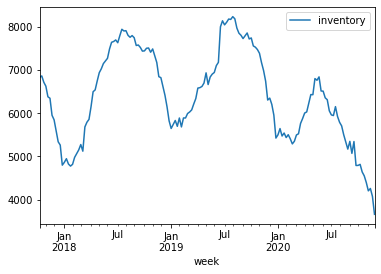

In [27]:
atx_inventory.plot(kind='line', x='week', y='inventory')

<AxesSubplot:xlabel='week'>

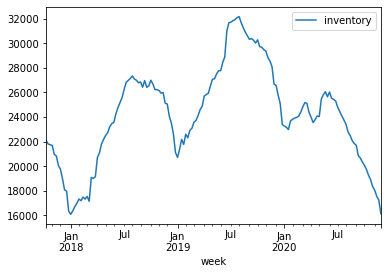

In [28]:
dfw_inventory =  mdf[mdf['RegionName'] == 'Dallas-Fort Worth, TX']
dfw_inventory.plot(kind='line',  x='week', y='inventory')
#plt.pyplot.plot(dfw_inventory['week'], dfw_inventory['inventory'])

#sns.lineplot(data=dfw_inventory, x='week', y='inventory')

In [29]:
dfw_inventory.dtypes

RegionName            object
SizeRank               int64
StateName             object
inventory            float64
week          datetime64[ns]
dtype: object

<AxesSubplot:xlabel='week'>

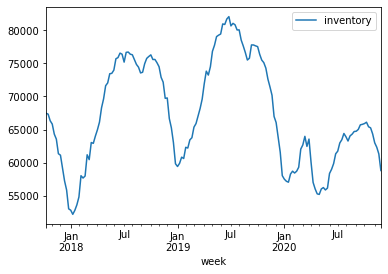

In [30]:
nyc_inventory =  mdf[mdf['RegionName'] == 'New York, NY']

nyc_inventory.plot(kind='line',  x='week', y='inventory')

<AxesSubplot:xlabel='week'>

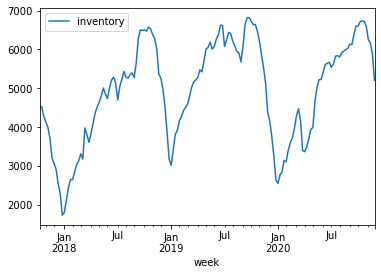

In [31]:
sfo_inventory =  mdf[mdf['RegionName'] == 'San Francisco, CA']

sfo_inventory.plot(kind='line',  x='week', y='inventory')

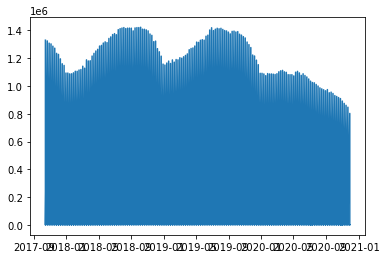

In [32]:
plt.pyplot.plot(mdf['week'], mdf['inventory'])